In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cifar = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


// y 값 레이블 변경


In [ ]:
y_train[0]

array([6], dtype=uint8)

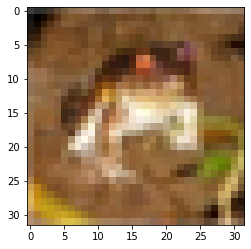

In [ ]:
plt.imshow(x_train[0])

In [ ]:
class_name = ['airplane', 'automobile','bird', 'cat','deer','dog' ,'frog', 'horse','sheep', 'truck' ]

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
x_train = x_train.reshape((-1, 32, 32, 3))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2
          )

Epoch 1/10
1250/1250 [==============================] - 21s 8ms/step - loss: 1.4146 - accuracy: 0.4936 - val_loss: 1.1291 - val_accuracy: 0.5923
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9882 - accuracy: 0.6554 - val_loss: 0.9323 - val_accuracy: 0.6728
Epoch 3/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7925 - accuracy: 0.7235 - val_loss: 0.8707 - val_accuracy: 0.7013
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6439 - accuracy: 0.7753 - val_loss: 0.8631 - val_accuracy: 0.7063
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.5074 - accuracy: 0.8201 - val_loss: 0.9447 - val_accuracy: 0.7082
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3773 - accuracy: 0.8658 - val_loss: 1.0184 - val_accuracy: 0.7090
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2692 - accuracy: 0.9049 - val_loss: 1.2465 - val_ac

// 오버피팅(over fitting)

How to prevent overfittig
1.Training data - da -> 데이터를 회전하거나 줌,좌우 반전등 처리

2.inside neural network - dropout -> 일부 node를 제외 시킴

3.Loss funtion/opt -L2 regularization -> 미분 결과를 조금 틀리게 만듬

4.Target value- disturb value -> train data에 다른 데이터를 섞음

5.smapling - weight random sampling

6.iteration session - early stop -> 변화 없을 시 학습을 멈춤

7.learning approach - semi - supervised learning

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2
          )

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6004 - accuracy: 0.4137 - val_loss: 1.3823 - val_accuracy: 0.5314
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2421 - accuracy: 0.5582 - val_loss: 1.1944 - val_accuracy: 0.5852
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0826 - accuracy: 0.6192 - val_loss: 1.0706 - val_accuracy: 0.6368
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9735 - accuracy: 0.6573 - val_loss: 1.0004 - val_accuracy: 0.6574
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8923 - accuracy: 0.6848 - val_loss: 1.0053 - val_accuracy: 0.6551
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8328 - accuracy: 0.7082 - val_loss: 0.9165 - val_accuracy: 0.6868
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7763 - accuracy: 0.7279 - val_loss: 0.9406 - val_accuracy:

dropout을 통해 오버피팅을 낮추려 했지만 아직 어느정도 오버피팅이 있으며 accurracy 또한 떨어졌습니다

레이어를 늘려 accurracy를 높이고 batchnomallization을 이용하여 오버피팅을 줄이겠습니다


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding ='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2
          )

Epoch 1/10
1250/1250 [==============================] - 13s 9ms/step - loss: 1.6036 - accuracy: 0.4216 - val_loss: 1.3858 - val_accuracy: 0.5290
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1875 - accuracy: 0.5806 - val_loss: 1.2007 - val_accuracy: 0.5838
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9833 - accuracy: 0.6556 - val_loss: 1.2202 - val_accuracy: 0.5658
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8686 - accuracy: 0.7016 - val_loss: 1.0012 - val_accuracy: 0.6552
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7712 - accuracy: 0.7339 - val_loss: 0.7867 - val_accuracy: 0.7243
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7055 - accuracy: 0.7574 - val_loss: 0.8866 - val_accuracy: 0.7026
Epoch 7/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.6544 - accuracy: 0.7775 - val_loss: 0.7861 - val_ac

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding ='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))

model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2
          )

Epoch 1/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.8400 - accuracy: 0.3089 - val_loss: 1.7100 - val_accuracy: 0.3630
Epoch 2/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.4369 - accuracy: 0.4780 - val_loss: 1.5197 - val_accuracy: 0.4980
Epoch 3/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1785 - accuracy: 0.5899 - val_loss: 1.3896 - val_accuracy: 0.5293
Epoch 4/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0074 - accuracy: 0.6562 - val_loss: 1.1366 - val_accuracy: 0.6137
Epoch 5/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.8989 - accuracy: 0.6971 - val_loss: 1.2307 - val_accuracy: 0.5705
Epoch 6/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.8155 - accuracy: 0.7272 - val_loss: 0.9428 - val_accuracy: 0.7036
Epoch 7/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.7423 - accuracy: 0.7519 - val_loss: 1.1674 -